In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

In [10]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv', on_bad_lines='skip')

In [11]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df = sentiment_df[['date', 'classification']]


In [12]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df.dropna(subset=['Timestamp IST'], inplace=True)
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df.dropna(subset=['Size USD', 'Closed PnL'], inplace=True)

In [13]:
merged_df = trader_df.merge(sentiment_df, on='date', how='left')
merged_df.dropna(subset=['classification'], inplace=True)
merged_df.to_csv('csv_files/merged_trader_sentiment_data.csv', index=False)

In [15]:

sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [17]:
pnl_vs_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reindex(sentiment_order)
ax1 = sns.barplot(x=pnl_vs_sentiment.index, y=pnl_vs_sentiment.values, palette="coolwarm", order=sentiment_order)
ax1.set_title('Average Trader Profit & Loss (PnL) vs. Market Sentiment', fontsize=16)
ax1.set_xlabel('Market Sentiment', fontsize=12)
ax1.set_ylabel('Average Closed PnL (USD)', fontsize=12)
plt.tight_layout()

plt.savefig('outputs/profit_vs_sentiment.png')
print("Saved 'profit_vs_sentiment.png' to 'outputs/'")
plt.clf()


Saved 'profit_vs_sentiment.png' to 'outputs/'


/tmp/ipython-input-2226252008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=pnl_vs_sentiment.index, y=pnl_vs_sentiment.values, palette="coolwarm", order=sentiment_order)


<Figure size 640x480 with 0 Axes>

In [18]:
volume_vs_sentiment = merged_df.groupby('classification')['Size USD'].sum().reindex(sentiment_order)

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=volume_vs_sentiment.index, y=volume_vs_sentiment.values, palette="viridis", order=sentiment_order)
ax2.set_title('Total Trading Volume (USD) vs. Market Sentiment', fontsize=16)
ax2.set_xlabel('Market Sentiment', fontsize=12)
ax2.set_ylabel('Total Volume (USD)', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
plt.tight_layout()
plt.savefig('outputs/volume_vs_sentiment.png')
print("Saved 'volume_vs_sentiment.png' to 'outputs/'")
plt.clf()



Saved 'volume_vs_sentiment.png' to 'outputs/'


/tmp/ipython-input-1504352549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=volume_vs_sentiment.index, y=volume_vs_sentiment.values, palette="viridis", order=sentiment_order)


<Figure size 1000x600 with 0 Axes>

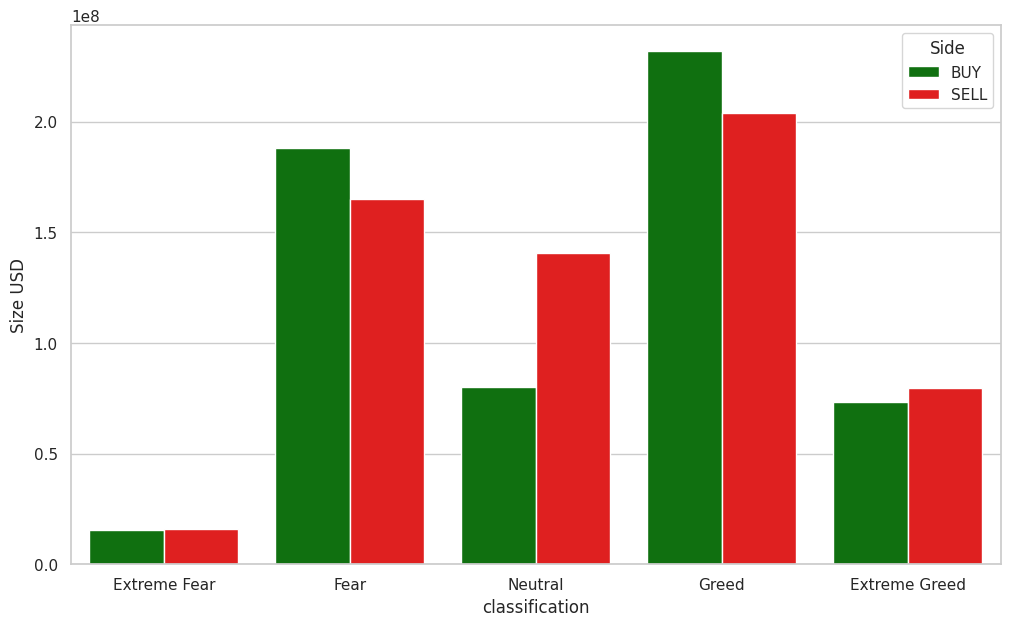

In [19]:
action_vs_sentiment = merged_df.groupby(['classification', 'Side'])['Size USD'].sum().reset_index()
action_vs_sentiment = action_vs_sentiment[action_vs_sentiment['Side'].isin(['BUY', 'SELL'])]

plt.figure(figsize=(12, 7))
ax3 = sns.barplot(data=action_vs_sentiment,x='classification',y='Size USD',hue='Side',order=sentiment_order,palette={'BUY': 'green', 'SELL': 'red'})


In [20]:
ax3.set_title('Trading Actions (Buy vs. Sell Volume) vs. Market Sentiment', fontsize=16)
ax3.set_xlabel('Market Sentiment', fontsize=12)
ax3.set_ylabel('Total Volume (USD)', fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

In [21]:
plt.legend(title='Trade Side')
plt.tight_layout()

plt.savefig('outputs/action_vs_sentiment.png')
print("Saved 'action_vs_sentiment.png' to 'outputs/'")
plt.clf()

Saved 'action_vs_sentiment.png' to 'outputs/'


/tmp/ipython-input-3817438690.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Trade Side')


<Figure size 640x480 with 0 Axes>